In [34]:
import numpy as np
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
from demo import Demo, Frames
import pandas as pd

In [131]:
# demo = Demo.load("demos/003539831729474764830_0420161581.dem", parse_rate=1)
demo = Demo.load("demos/match730_003542714992560177238_0804145047_183.dem", parse_rate=1)

In [135]:
rounds = Frames.from_demo(demo)
# rounds.dump("demos/003539831729474764830_0420161581.zip")

In [ ]:
rounds = Frames.from_zip("demos/003539831729474764830_0420161581.zip")

In [78]:
replay = rounds[1]
replay["name"].unique()

array(['Shiar112', 'wdnmd', 'Steupid', 'sh1ro', 'Serendipity',
       '她与残局皆遗憾，一比十五我开转', '天皓', 'SHELLY', 'zako', 'John Ripper'],
      dtype=object)

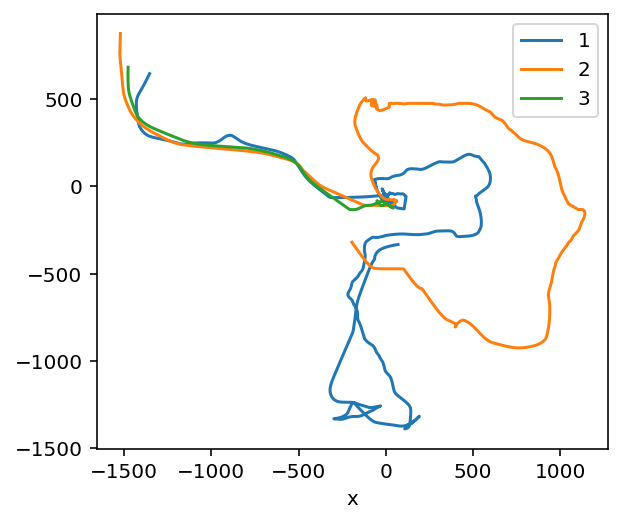

In [72]:
replay = rounds[1:10]

fig, ax = plt.subplots()
ax.set_aspect("equal")

img = plt.imread("resources/De_cache_radar.png")
# img = np.rot90(img)
# img = np.flip(img, 0)
# ax.imshow(img)

for k in range(1, 4):
    movs = replay[(replay["name"] == "sh1ro") & (replay["roundNum"] == k)][["x", "y"]]
    # movs.x = (movs.x + 1800) / 4
    # movs.y = (movs.y + 1600) / 4
    movs.columns = ["x", f"{k}"]
    movs.plot(x="x", y=f"{k}", ax=ax)

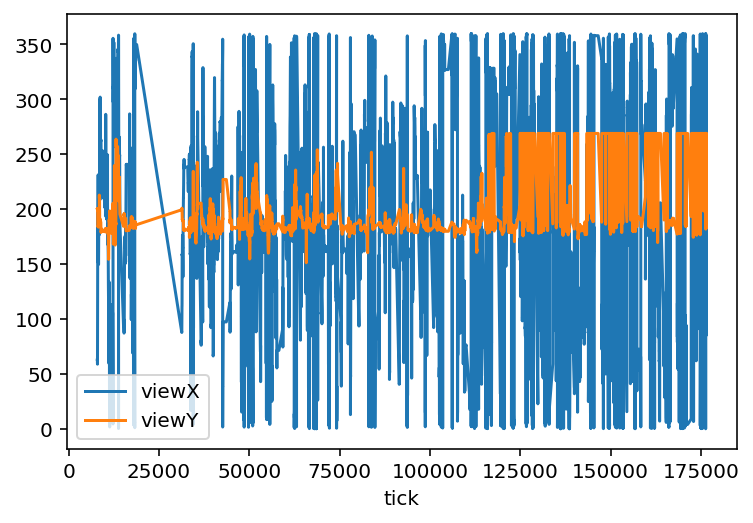

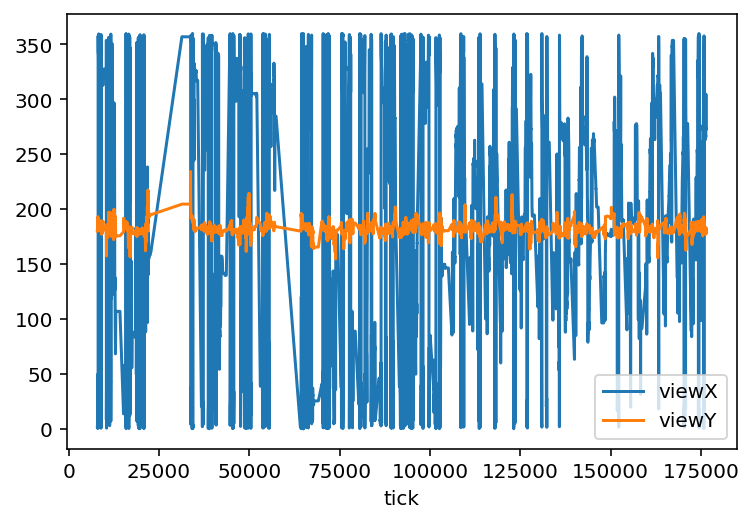

In [87]:
replay = rounds[1:30]

def plot_view(ax, name):
    player = replay[replay["name"] == name]

    player["viewX"] = (player["viewX"] + 180) % 360
    player["viewY"] = (player["viewY"] + 180) % 360

    player.plot(x="tick", y="viewX", ax=ax)
    player.plot(x="tick", y="viewY", ax=ax)

fig, ax = plt.subplots()
plot_view(ax, "sh1ro")

fig, ax = plt.subplots()
plot_view(ax, "John Ripper")

<AxesSubplot:ylabel='Frequency'>

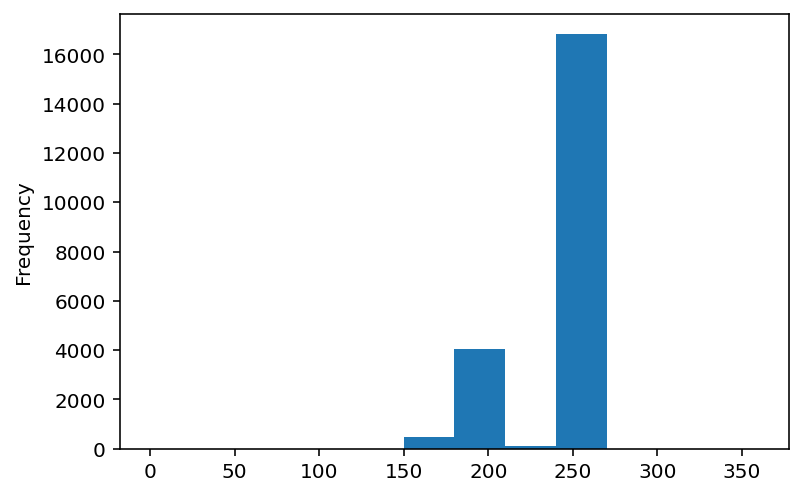

In [94]:
replay = rounds[20:30]

player = replay[replay["name"] == "sh1ro"]

player["viewX"] = (player["viewX"] + 180) % 360
player["viewY"] = (player["viewY"] + 180) % 360

player["viewY"].plot.hist(bins=12, range=[0, 360])

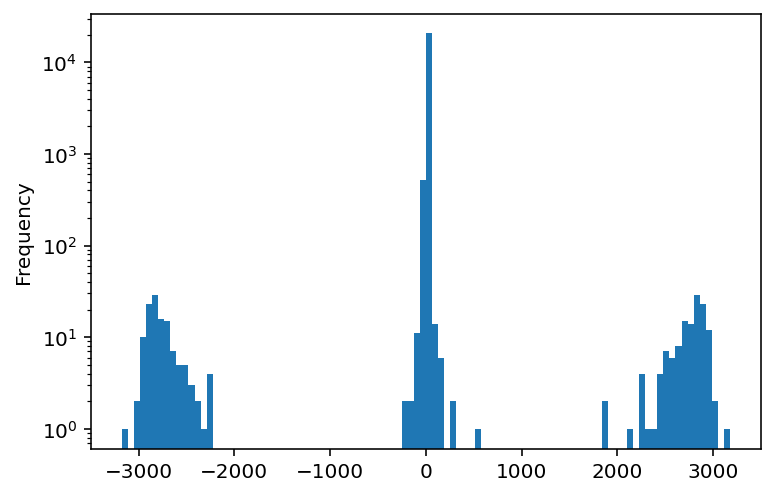

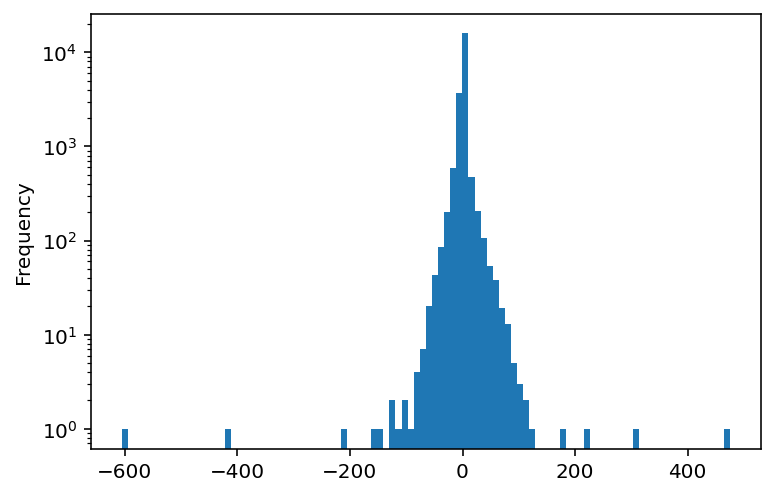

In [101]:
replay = rounds[20:30]

def plot_dview_hist(name):
    player = replay[replay["name"] == name]

    player["viewX"] = (player["viewX"] + 180) % 360
    player["viewY"] = (player["viewY"] + 180) % 360

    ms_per_tick = 1 / 64

    time = player['tick'] * ms_per_tick
    player["dViewY"] = player['viewY'].diff() / time.diff()
    player["dViewX"] = player['viewX'].diff() / time.diff()
    player["dView"] = (player['dViewX'] ** 2 + player['dViewY'] ** 2) ** 0.5

    player["dViewY"].plot.hist(bins=100)

fig, ax = plt.subplots()
ax.set_yscale('log')
plot_dview_hist("sh1ro")
fig, ax = plt.subplots()
ax.set_yscale('log')
plot_dview_hist("John Ripper")

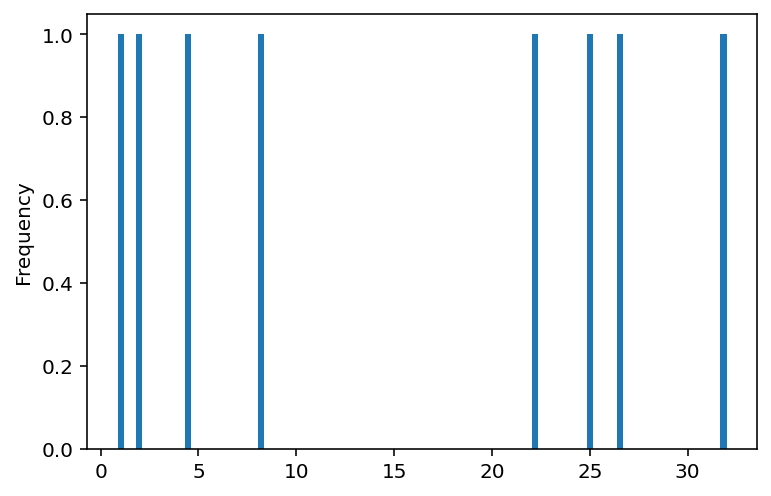

In [155]:
replay = rounds[12]

def find_suspect(name, round_num):
    damages = demo.damages

    player = replay[replay['name'] == name].reset_index(drop=True)
    player = player[player["roundNum"] == round_num].reset_index(drop=True)

    player["viewX"] = (player["viewX"] + 180) % 360
    player["viewY"] = (player["viewY"] + 180) % 360

    attacks = damages[damages['attackerName'] == name]
    hits = attacks[attacks["hpDamageTaken"] > 0].reset_index(drop=True)

    replay_ticks = player["tick"].values
    hits_ticks = hits["tick"].values

    i, j = np.where((replay_ticks[:, None] > hits_ticks - 4) & (replay_ticks[:, None] < hits_ticks + 4))
    hit_frames = player.loc[i, :].reset_index(drop=True)

    ms_per_tick = 1 / 64

    time = hit_frames['tick'] * ms_per_tick

    hit_frames["dViewY"] = hit_frames['viewY'].diff() / time.diff()
    hit_frames["dViewX"] = hit_frames['viewX'].diff() / time.diff()
    hit_frames["dView"] = (hit_frames['dViewX'] ** 2 + hit_frames['dViewY'] ** 2) ** 0.5

    # hit_frames[["tick", "viewX", "viewY", "dViewY", "dViewX"]]

    # hit_frames.plot(x="tick", y=["dViewX", "dViewY"])
    hit_frames["dView"].plot.hist(bins=100)

# find_suspect("John Ripper")
find_suspect("-mblw-", 12)

In [153]:
replay = rounds[12]
damages = demo.damages

# damages[damages["attackerName"] == "-mblw-"][["roundNum", "weapon"]]
replay[replay["activeWeapon"] == "P250"]

,roundNum,tick,seconds,side,teamName,steamID,name,team,x,y,...,cash,cashSpendThisRound,cashSpendTotal,hasHelmet,hasDefuse,hasBomb,ping,zoomLevel,matchID,mapName
4028,12,50263,12.825397,T,,76561199064492045,-mblw-,,-974.649536,-583.997192,...,0,800,23550,False,False,False,17,0,match730_003542714992560177238_0804145047_183,de_train
4039,12,50265,12.857143,T,,76561199064492045,-mblw-,,-975.726379,-583.997192,...,0,800,23550,False,False,False,17,0,match730_003542714992560177238_0804145047_183,de_train
4049,12,50267,12.888889,T,,76561199064492045,-mblw-,,-976.869141,-584.009277,...,0,800,23550,False,False,False,17,0,match730_003542714992560177238_0804145047_183,de_train
4056,12,50269,12.920635,T,,76561199064492045,-mblw-,,-978.063782,-584.064270,...,0,800,23550,False,False,False,17,0,match730_003542714992560177238_0804145047_183,de_train
4068,12,50271,12.952381,T,,76561199064492045,-mblw-,,-979.656616,-584.766479,...,0,800,23550,False,False,False,17,0,match730_003542714992560177238_0804145047_183,de_train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14926,12,52443,18.730159,T,,76561199064492045,-mblw-,,1162.174194,-1329.721680,...,4150,0,23550,False,False,False,16,0,match730_003542714992560177238_0804145047_183,de_train
14936,12,52445,18.761905,T,,76561199064492045,-mblw-,,1166.350464,-1323.696777,...,4150,0,23550,False,False,False,16,0,match730_003542714992560177238_0804145047_183,de_train
14946,12,52447,18.793651,T,,76561199064492045,-mblw-,,1170.526733,-1317.671875,...,4150,0,23550,False,False,False,16,0,match730_003542714992560177238_0804145047_183,de_train
14956,12,52449,18.825397,T,,76561199064492045,-mblw-,,1174.703003,-1311.646973,...,4150,0,23550,False,False,False,16,0,match730_003542714992560177238_0804145047_183,de_train
